Integrantes:

David Bugoi

Fernando Javier Gómez Márquez

Daniel Hernández Martínez

### Carga de datos

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
#RANDOM_STATE = 527
RANDOM_STATE = 813

In [3]:
df = pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

Comprobamos si existen valores nulos en el dataframe

In [4]:
df.isnull().values.any()

False

Como no hay ningún null ni NaN no hay que hacer tratamiento al dataframe. En caso de existir algún valor null tendríamos dos opiones: eliminar la fila o sustituir los nulos por algún valor, generalmente la media de la columna  

### Preanálisis de los datos

In [5]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

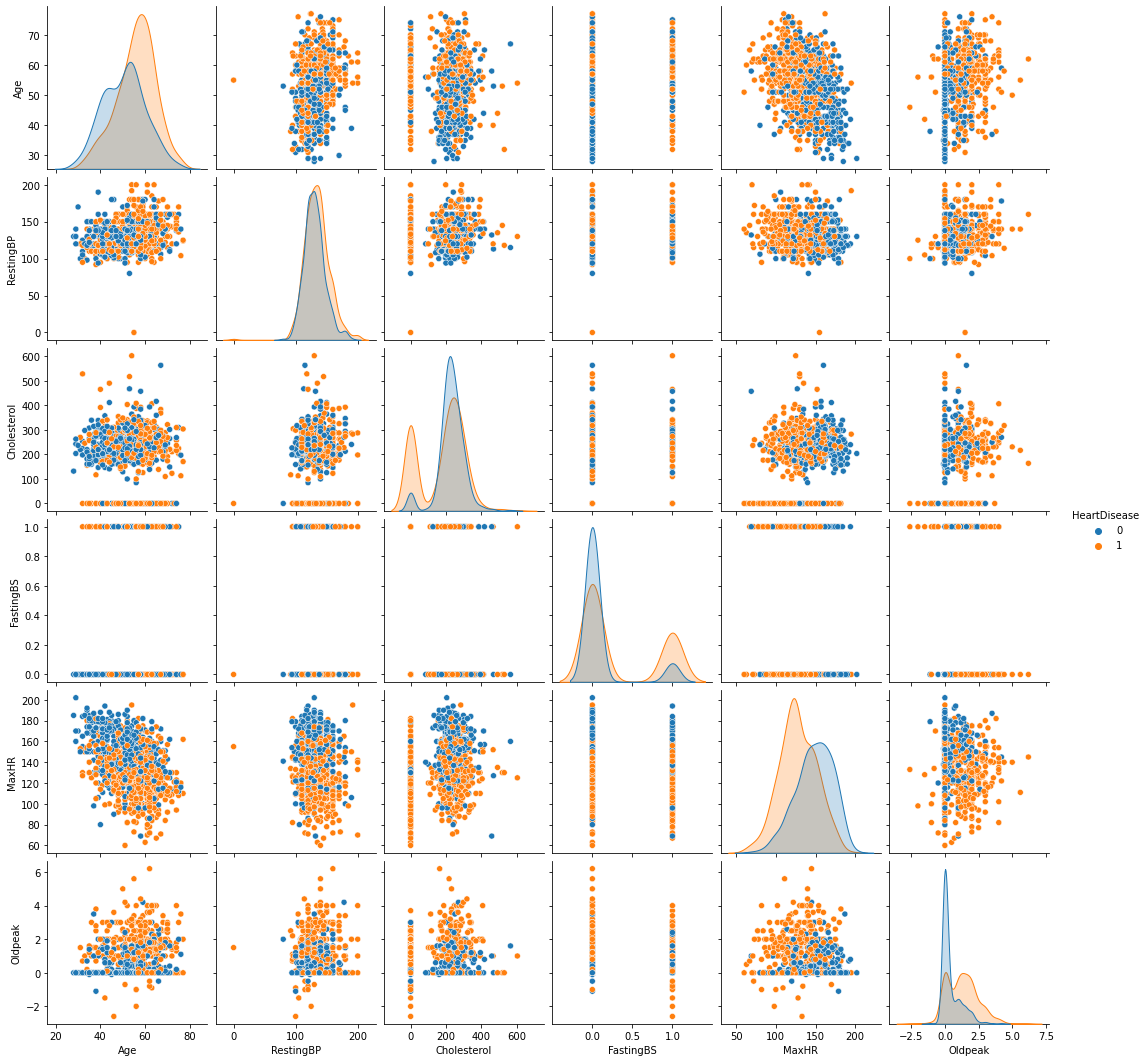

In [6]:
sns.pairplot(df.loc[:, ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']], diag_kind='kde', hue='HeartDisease')

In [7]:
df.corr(method='pearson')

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [8]:
px.imshow(df.corr(method='pearson'),title="Correlacion")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
encoder = OneHotEncoder(handle_unknown = 'ignore')
X = df.drop(['HeartDisease'], axis=1).values
y = df['HeartDisease'].values

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)

In [12]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = RANDOM_STATE)

In [13]:
"""encoder = preprocessing.OneHotEncoder()
X_train_oneHot = encoder.fit_transform(X_train).toarray()
X_train_oneHot[29]"""

'encoder = preprocessing.OneHotEncoder()\nX_train_oneHot = encoder.fit_transform(X_train).toarray()\nX_train_oneHot[29]'

In [14]:
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   12    1              1         41          147          0           1   
1   21    0              2         55           40          0           1   
2    9    1              1         31          141          0           2   
3   20    0              0         39           72          0           1   
4   26    1              2         49           53          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     98               0       10         2             0  
1     82               0       20         1             1  
2     25               0       10         2             0  
3     34               1       25         1             1  
4     48               0       10         2             0

In [15]:
X = df_label.drop(['HeartDisease'], axis=1).values
y = df_label['HeartDisease'].values

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size=0.1, random_state = RANDOM_STATE)

In [16]:
X_train_label[1]

array([37,  1,  0, 49, 93,  0,  1, 46,  1, 25,  1], dtype=int64)

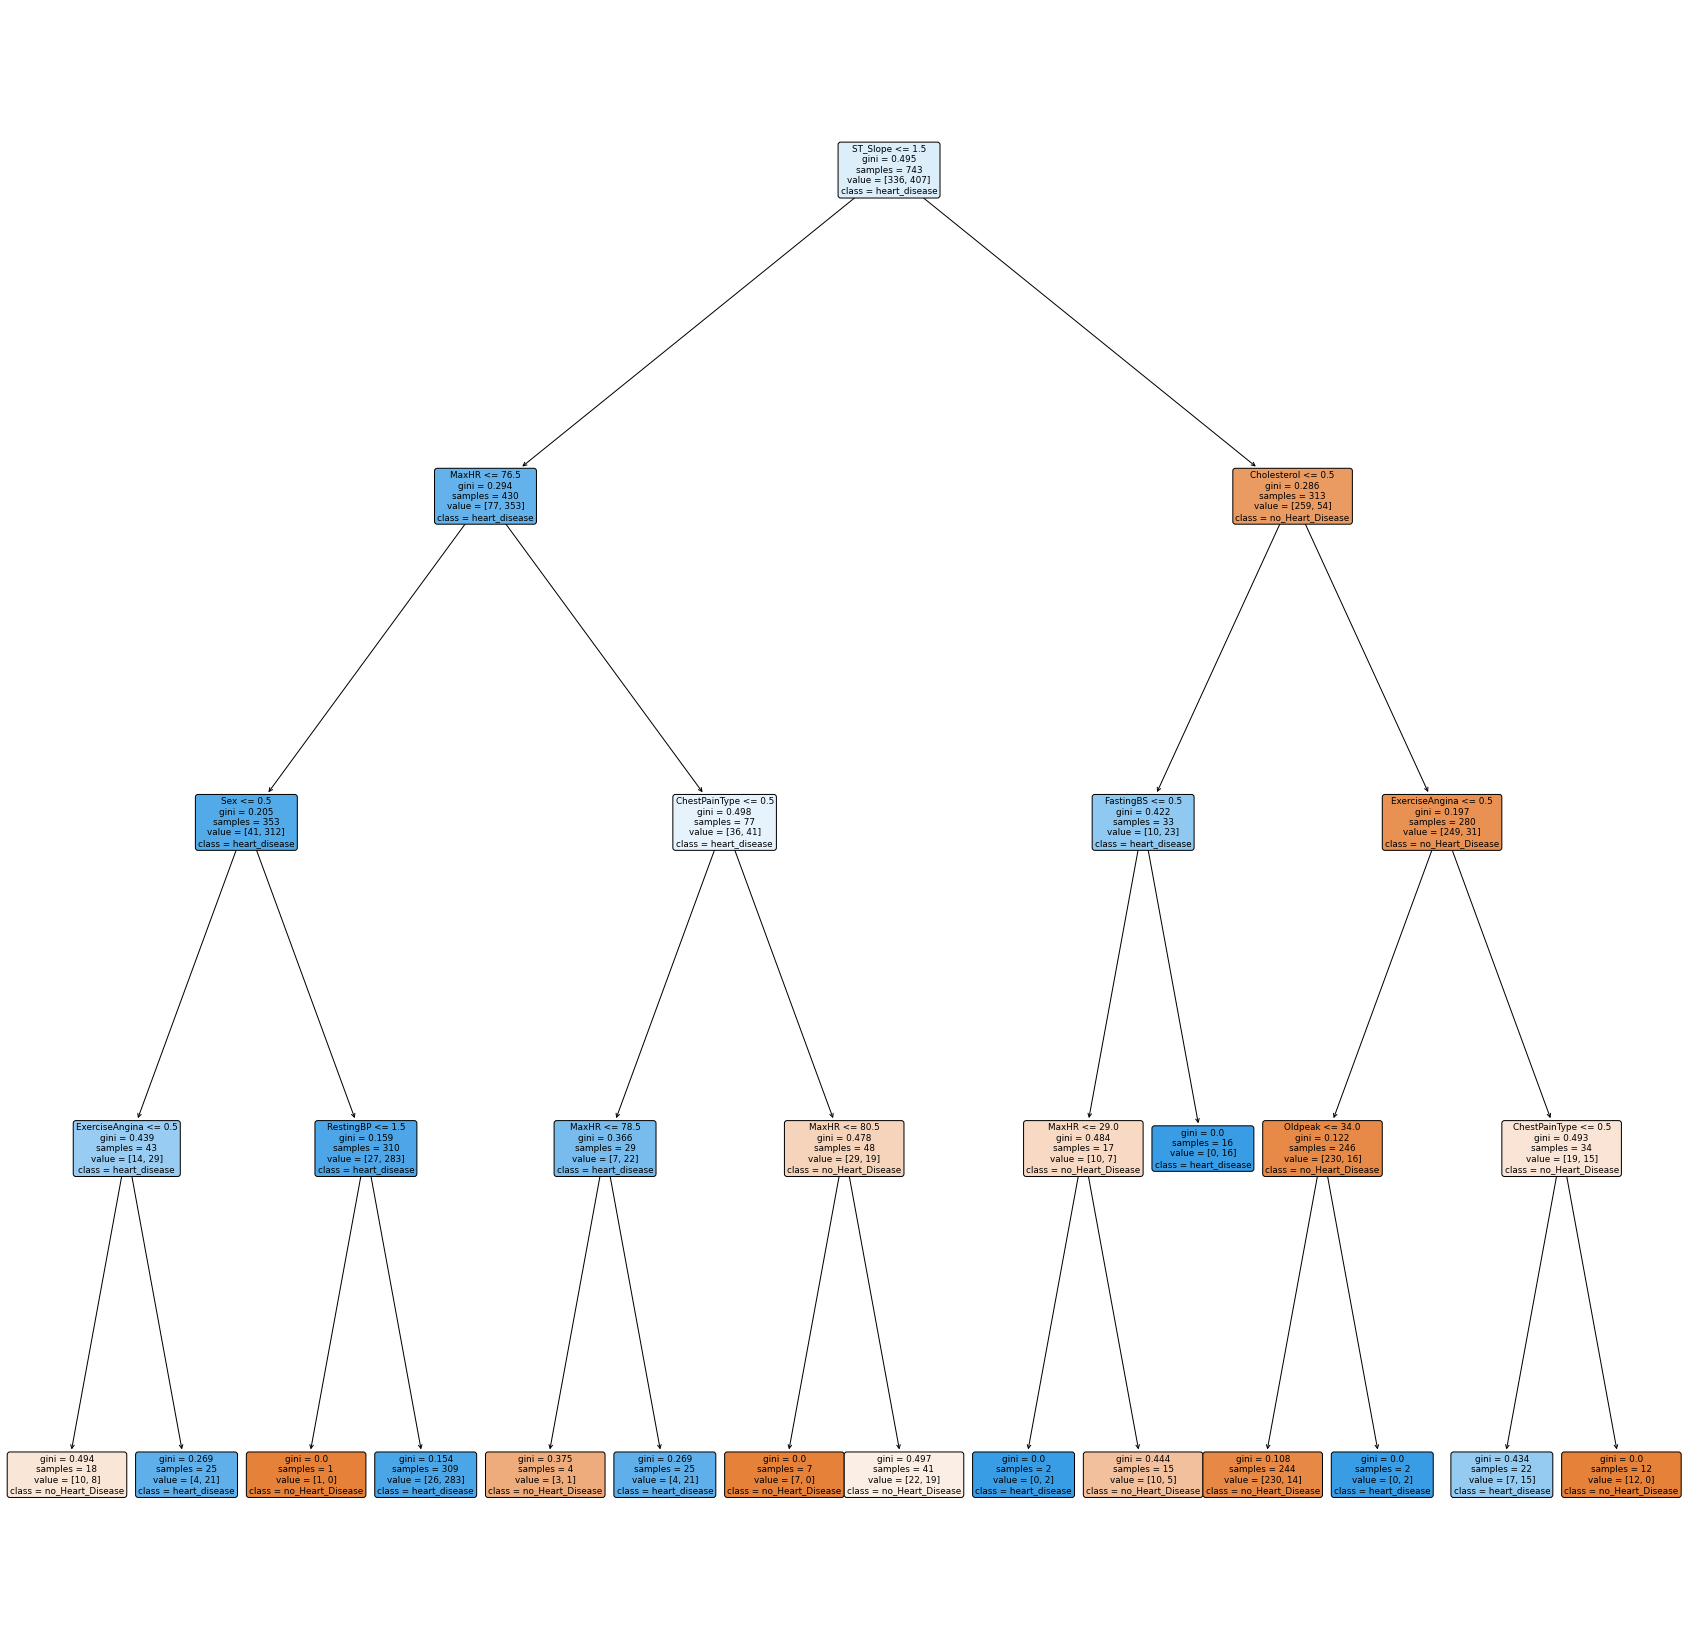

In [17]:
target_names = ['no_Heart_Disease', 'heart_disease']

clasif = DecisionTreeClassifier(random_state = RANDOM_STATE, max_depth = 4)
clasif.fit(X_train_label, y_train_label)
plt.figure(figsize=(30,30))
plot_tree(clasif, filled = True, feature_names = df_label.columns, class_names = target_names, rounded=True)
plt.show()

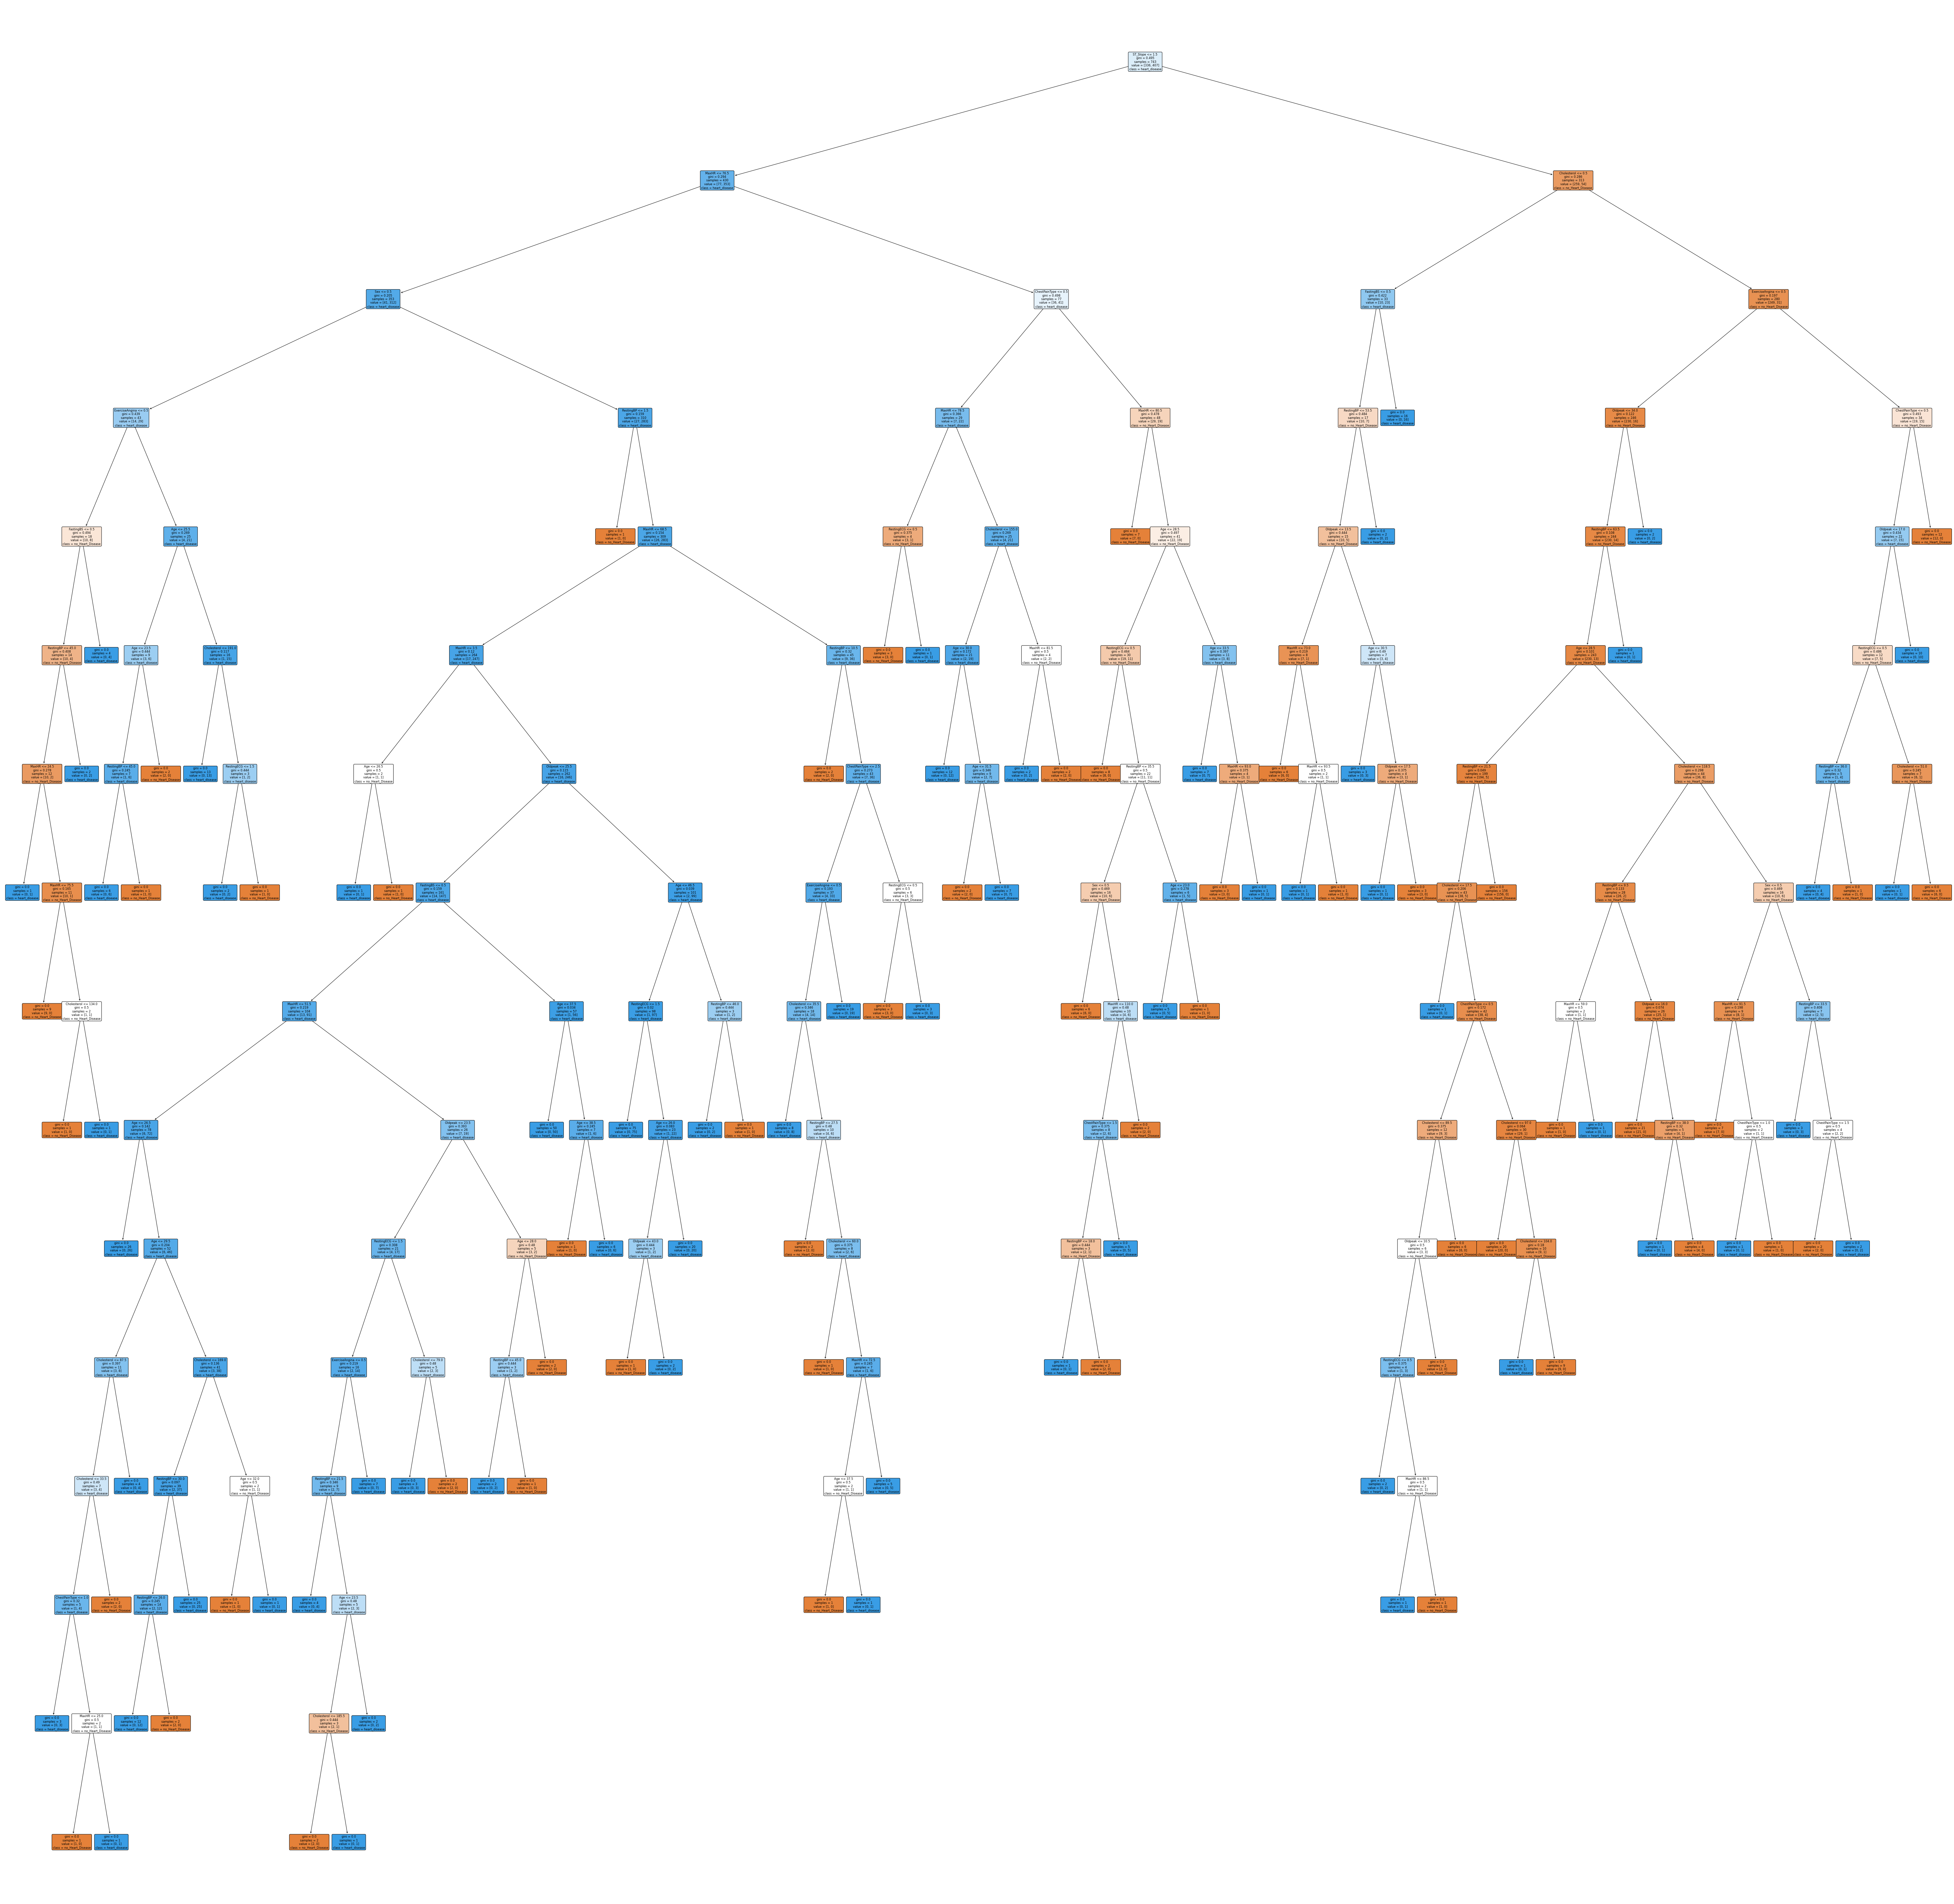

In [18]:
clasif = DecisionTreeClassifier(random_state = RANDOM_STATE)
clasif.fit(X_train_label, y_train_label)
plt.figure(figsize=(100,100))
plot_tree(clasif, filled = True, feature_names = df_label.columns, class_names = target_names, rounded=True)
plt.show()

In [19]:
clasif.get_depth()

15

In [20]:
prof_limit = clasif.get_depth() + 1

In [21]:
train_accuracy = clasif.score(X_train_label, y_train_label)
test_accuracy = clasif.score(X_test_label, y_test_label)
print("Precision en el aprendizaje:", train_accuracy)
print("Precision en el test:", test_accuracy)

Precision en el aprendizaje: 1.0
Precision en el test: 0.8043478260869565


In [22]:
crit_values = ["gini", "entropy"]
train_accuracies = []
val_accuracies = []

for crit in crit_values:
    train_accuracies_crit = []
    val_accuracies_crit = []
    for prof in range(2, prof_limit):
        clasif = DecisionTreeClassifier(criterion = crit, random_state = RANDOM_STATE, max_depth = prof)
        clasif.fit(X_train_label, y_train_label)
        
        train_accu = clasif.score(X_train_label, y_train_label)
        val_accu = clasif.score(X_val_label, y_val_label)
        
        train_accuracies_crit.append(train_accu)
        val_accuracies_crit.append(val_accu)
    
    train_accuracies.append(train_accuracies_crit)
    val_accuracies.append(val_accuracies_crit)

In [23]:
train_accuracies

[[0.8411843876177658,
  0.8586810228802153,
  0.8815612382234186,
  0.9004037685060565,
  0.9232839838492598,
  0.9407806191117093,
  0.955585464333782,
  0.9623149394347241,
  0.9730820995962315,
  0.9825033647375505,
  0.9865410497981157,
  0.9932705248990579,
  0.9986541049798116,
  1.0],
 [0.8411843876177658,
  0.8586810228802153,
  0.8748317631224765,
  0.8990578734858681,
  0.9084791386271871,
  0.9407806191117093,
  0.955585464333782,
  0.9703903095558546,
  0.9811574697173621,
  0.9946164199192463,
  0.9986541049798116,
  1.0,
  1.0,
  1.0]]

In [24]:
val_accuracies

[[0.8674698795180723,
  0.8674698795180723,
  0.8674698795180723,
  0.8554216867469879,
  0.8674698795180723,
  0.8554216867469879,
  0.8433734939759037,
  0.8433734939759037,
  0.8192771084337349,
  0.8192771084337349,
  0.8554216867469879,
  0.8313253012048193,
  0.8433734939759037,
  0.8072289156626506],
 [0.8674698795180723,
  0.8674698795180723,
  0.8674698795180723,
  0.8795180722891566,
  0.8674698795180723,
  0.8554216867469879,
  0.8554216867469879,
  0.8433734939759037,
  0.7951807228915663,
  0.8072289156626506,
  0.8192771084337349,
  0.8313253012048193,
  0.8313253012048193,
  0.8313253012048193]]

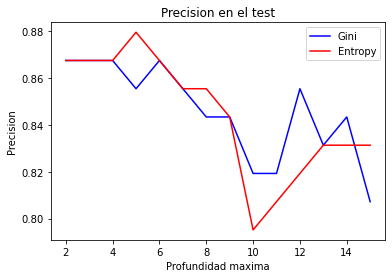

In [25]:
plt.plot(range(2, prof_limit), val_accuracies[0], label="Gini", color="b")
plt.plot(range(2, prof_limit), val_accuracies[1], label="Entropy", color="r")
plt.title("Precision en el test")
plt.xlabel("Profundidad maxima")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

In [26]:
max_accu = max_prof = 0
max_crit = None

for crit_num in range(len(crit_values)):
    for prof in range(prof_limit - 2):
        if val_accuracies[crit_num][prof] > max_accu:
            max_accu = val_accuracies[crit_num][prof]
            max_crit = crit_values[crit_num]
            max_prof = prof + 2

print("Mejor criterio:", max_crit)
print("Mejor profundidad:", max_prof)

Mejor criterio: entropy
Mejor profundidad: 5


In [27]:
clasif = DecisionTreeClassifier(criterion = max_crit, random_state = RANDOM_STATE, max_depth = max_prof)
clasif.fit(X_train_label, y_train_label)

train_accuracy = clasif.score(X_train_label, y_train_label)
test_accuracy = clasif.score(X_test_label, y_test_label)
print("Precision en el aprendizaje:", train_accuracy)
print("Precision en el test:", test_accuracy)

Precision en el aprendizaje: 0.8990578734858681
Precision en el test: 0.8369565217391305


In [28]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [35]:
categ_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_oneHot=pd.get_dummies(df,columns=categ_columns,drop_first=False)
df_oneHot

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0      1                  0  ...                  0   
1        1      0                  0  ...                  1   
2        0      1                  0  ...                  0   
3        1      0                  1  ...                  0   
4        0      1                  0  ...                  1   
..     ...    ...                ...  ...                ...   
913      0      1                  0  ...                  0   
914      0      1                  1  ...                  0   
915      0      1                  1  ...                  0   
916      1      0                  0  ...                  0   
917      0      1                  0  ...                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                   1                 0              0              0   
1                   1                 0              0              1   
2                   1                 0              0              0   
3                   0                 1              0              1   
4                   1                 0              0              0   
..                ...               ...            ...            ...   
913                 1                 0              0              1   
914                 1                 0              0              1   
915                 0                 1              0              1   
916                 1                 0              0              1   
917                 1                 0              0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 21 columns]

In [36]:
df_label

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          147          0           1   
1     21    0              2         55           40          0           1   
2      9    1              1         31          141          0           2   
3     20    0              0         39           72          0           1   
4     26    1              2         49           53          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   17    1              3         14          122          0           1   
914   40    1              0         45           51          1           1   
915   29    1              0         31            9          0           1   
916   29    0              1         31           94          0           0   
917   10    1              2         39           35          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0       98               0       10         2             0  
1       82               0       20         1             1  
2       25               0       10         2             0  
3       34               1       25         1             1  
4       48               0       10         2             0  
..     ...             ...      ...       ...           ...  
913     58               0       22         1             1  
914     67               0       42         1             1  
915     41               1       22         1             1  
916    100               0       10         1             1  
917     99               0       10         2             0  

[918 rows x 12 columns]

In [37]:
df_oneHot

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0      1                  0  ...                  0   
1        1      0                  0  ...                  1   
2        0      1                  0  ...                  0   
3        1      0                  1  ...                  0   
4        0      1                  0  ...                  1   
..     ...    ...                ...  ...                ...   
913      0      1                  0  ...                  0   
914      0      1                  1  ...                  0   
915      0      1                  1  ...                  0   
916      1      0                  0  ...                  0   
917      0      1                  0  ...                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                   1                 0              0              0   
1                   1                 0              0              1   
2                   1                 0              0              0   
3                   0                 1              0              1   
4                   1                 0              0              0   
..                ...               ...            ...            ...   
913                 1                 0              0              1   
914                 1                 0              0              1   
915                 0                 1              0              1   
916                 1                 0              0              1   
917                 1                 0              0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 21 columns]